# Health data preprocessing and input modelling exercises.

**In this lab you will:**

* Gain practical knowledge in pre-processing and analysing real world stochastic health system data
* Learn how to fit distribution to data
* Learn how to select a suitable distribution for your data

> **STUDENT BEWARE**: This lab can be very frustrating and will test your `pandas` skills! It is designed to show you the sort of data wrangling, analysis and modelling decisions/assumptions you may need to perform in real simulation study.  But do persevere with it (answers are available as well!).  The experience should demonstrate that fitting distributions to real data is difficult and not quite as textbooks make out! By the end of the lab both your `pandas` skills and simulation input modelling skills will have improved.  >_<  


> **P.s** if you think this Lab is hard then you should have seen the original lab I wrote back in the summer...

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Read in raw data

In [2]:
ed = pd.read_csv('syned_data.csv')

In [3]:
ed.shape

(477149, 6)

In [4]:
ed.head()

,Unnamed: 0,Age_Band,Sex,AE_Arrive_Date,AE_Arrive_HourOfDay,AE_Time_Mins
0,0,65-84,1.0,2015-07-02,17-20,210.0
1,42,85+,1.0,2017-03-06,09-12,310.0
2,181,45-64,1.0,2014-06-03,13-16,100.0
3,225,65-84,2.0,2015-02-17,05-08,320.0
4,485,45-64,1.0,2017-11-11,05-08,100.0


In [5]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477149 entries, 0 to 477148
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           477149 non-null  int64  
 1   Age_Band             477149 non-null  object 
 2   Sex                  477135 non-null  float64
 3   AE_Arrive_Date       477149 non-null  object 
 4   AE_Arrive_HourOfDay  477137 non-null  object 
 5   AE_Time_Mins         477149 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 21.8+ MB


In [6]:
ed['AE_Arrive_Date'] = pd.to_datetime(ed['AE_Arrive_Date'])

In [7]:
ed.sort_values(['AE_Arrive_Date', 'AE_Arrive_HourOfDay']).head()

,Unnamed: 0,Age_Band,Sex,AE_Arrive_Date,AE_Arrive_HourOfDay,AE_Time_Mins
8218,1131707,25-44,2.0,2014-03-23,01-04,50.0
88673,12172075,85+,2.0,2014-03-23,01-04,130.0
137649,18949836,1-17,1.0,2014-03-23,01-04,140.0
139063,19150123,45-64,2.0,2014-03-23,01-04,160.0
146786,20229698,18-24,2.0,2014-03-23,01-04,230.0


In [8]:
ed.AE_Arrive_Date.max()

Timestamp('2018-03-22 00:00:00')

In [9]:
ed.AE_Arrive_Date.min()

Timestamp('2014-03-23 00:00:00')

In [10]:
#calculate the number of days
days = (ed.AE_Arrive_Date.max() - ed.AE_Arrive_Date.min()).days

In [11]:
select = ['AE_Arrive_Date', 'AE_Arrive_HourOfDay', 'Age_Band']
arrival_pivot = ed[select].groupby(by=['AE_Arrive_Date', 
                                             'AE_Arrive_HourOfDay']).count()

arrival_pivot.columns = ['Arrivals']
arrival_pivot.head()

Arrivals
AE_Arrive_Date AE_Arrive_HourOfDay          
2014-03-23     01-04                      12
               05-08                      20
               09-12                     103
               13-16                      83
               17-20                      79

In [12]:
select = ['AE_Arrive_HourOfDay', 'Age_Band']
arrival_pivot = ed[select].groupby(by=['AE_Arrive_HourOfDay']).count()

arrival_pivot.columns = ['Arrivals']
arrival_pivot['mean_daily_arrivals'] = arrival_pivot['Arrivals'] / days
arrival_pivot['IAT'] = (60 * 4) / arrival_pivot['mean_daily_arrivals']
arrival_pivot

,Arrivals,mean_daily_arrivals,IAT
AE_Arrive_HourOfDay,,,
01-04,30300,20.753425,11.564356
05-08,38106,26.100000,9.195402
09-12,137951,94.486986,2.540032
13-16,122268,83.745205,2.865836
17-20,105236,72.079452,3.329659
21-24,43276,29.641096,8.096867


# Exercise 2: Choosing a distribution to model length of stay

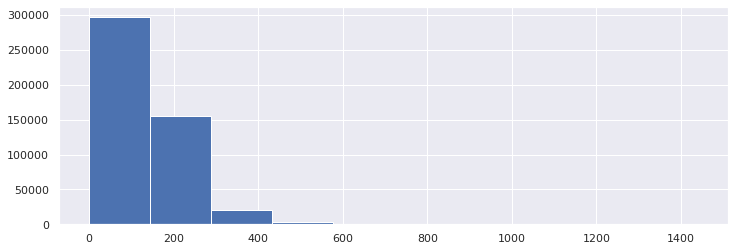

In [13]:
ax = ed['AE_Time_Mins'].hist(figsize=(12,4))

In [14]:
#auto_fit function from pythonhealthcare.org
from input_modelling.fitting import auto_fit

In [15]:
ed['AE_Time_Mins'] = ed['AE_Time_Mins'].astype(float)

In [16]:
## this will take 30 or so seconds to run as it is a lot of data.
auto_fit(ed['AE_Time_Mins'], pp=False, hist=False)

[  0.           2.04081633   4.08163265   6.12244898   8.16326531
  10.20408163  12.24489796  14.28571429  16.32653061  18.36734694
  20.40816327  22.44897959  24.48979592  26.53061224  28.57142857
  30.6122449   32.65306122  34.69387755  36.73469388  38.7755102
  40.81632653  42.85714286  44.89795918  46.93877551  48.97959184
  51.02040816  53.06122449  55.10204082  57.14285714  59.18367347
  61.2244898   63.26530612  65.30612245  67.34693878  69.3877551
  71.42857143  73.46938776  75.51020408  77.55102041  79.59183673
  81.63265306  83.67346939  85.71428571  87.75510204  89.79591837
  91.83673469  93.87755102  95.91836735  97.95918367 100.        ]
[-1.45145495 -1.34149878 -1.23154261 -1.12158643 -1.12158643 -1.12158643
 -1.01163026 -1.01163026 -0.90167409 -0.90167409 -0.90167409 -0.79171791
 -0.79171791 -0.68176174 -0.68176174 -0.68176174 -0.57180556 -0.57180556
 -0.46184939 -0.46184939 -0.46184939 -0.35189322 -0.35189322 -0.24193704
 -0.24193704 -0.13198087 -0.13198087 -0.0220247  

KeyboardInterrupt: 

In [ ]:
# Exercise 3: LoS by age banding

In [ ]:
#over 65s = 65-84 or 85+
over65s = ed.loc[(ed['Age_Band'] == '65-84') | 
                       (ed['Age_Band'] == '85+')]
over65s.head()

In [ ]:
under85s = ed.loc[ed['Age_Band'] != '85+']

In [ ]:
over65s['AE_Time_Mins'].describe()

In [ ]:
under85s['AE_Time_Mins'].describe()

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12,4), sharex=True)
ax[0].hist(over65s['AE_Time_Mins'], density=True)
ax[1].hist(under85s['AE_Time_Mins'],  density=True);

In [ ]:
auto_fit(over65s['AE_Time_Mins'])

In [ ]:
under85s.info()

In [ ]:
under85s['AE_Time_Mins']

In [ ]:
data_to_fit = under85s['AE_Time_Mins']

In [ ]:
data_to_fit = over65s['AE_Time_Mins']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
y = data_to_fit.dropna().to_numpy()
size = len(y)
sc = StandardScaler() 
yy = y.reshape(-1, 1)
sc.fit(yy)
y_std = sc.transform(yy)
y_std = y_std.flatten()
del yy

dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              'weibull_min', 
              'weibull_max']

# Set up empty lists to store results
chi_square = []
p_values = []

# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins
percentile_bins = np.linspace(0,100,50)

#percentile_cutoffs = np.percentile(y_std, percentile_bins)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
try:
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
except ValueError:
    #doesn't like 50 bins so use default values
    observed_frequency, bins = (np.histogram(y_std))
cum_observed_frequency = np.cumsum(observed_frequency)

In [ ]:
cum_observed_frequency

In [ ]:
plt.hist(y_std);